# Outlier detection with PCA.

**PCA** is particularly useful when dealing with **high-dimensional data** because it reduces the dimensionality while retaining most of the important information. It can capture complex relationships and correlations among variables, making it **suitable for identifying outliers with multivariate dependencies.** PCA assumes that the data follow a Gaussian distribution, which may not always hold true for all datasets.

**Outlier detection** is devided in to **univaiate analysis** (looking at one variable) and **multivariate analysis** (looking at multiple variables). A univariate analysis is only good enough of each of the variables in your data set is independent of each other.

To clearify we will show a **short example** regarding a group of people with given height and weight.

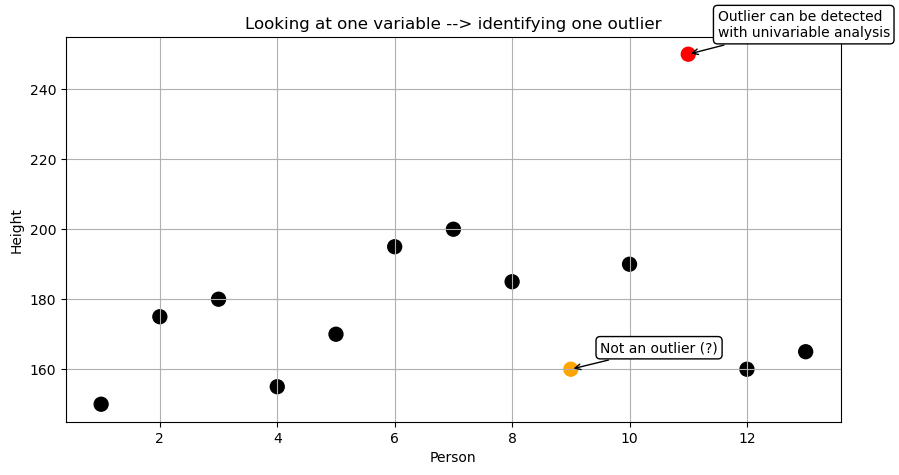

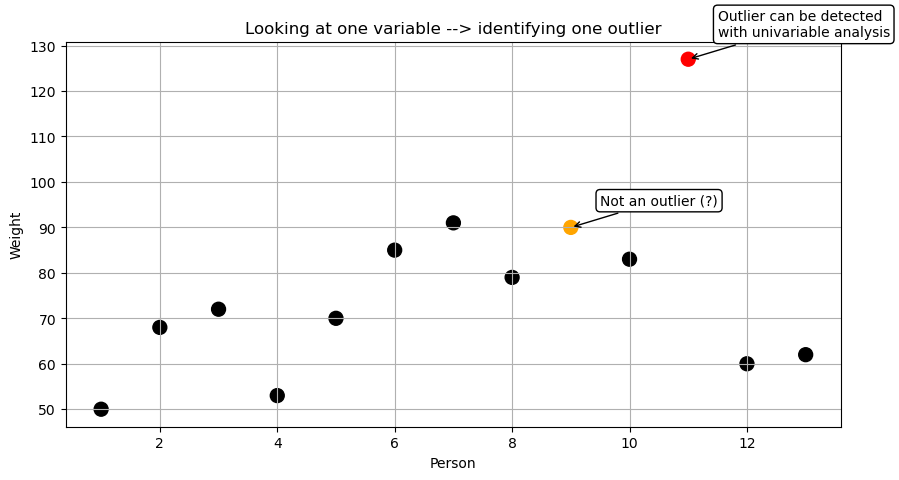

In [12]:
import matplotlib.pyplot as plt

# Define the dataset
persons = list(range(1, 14))
heights = [150, 175, 180, 155, 170, 195, 200, 185, 160, 190, 250, 160, 165]
weights = [50, 68, 72, 53, 70, 85, 91, 79, 90, 83, 127, 60, 62]
outliers = [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0]

# Define colours based on outlier status
colors = ['black' if o == 0 else 'red' if o == 1 else 'orange' for o in outliers]

# Find the index of the red and orange dots
red_index = outliers.index(1)
orange_index = outliers.index(2)

# Annotation texts
red_annotation = "Outlier can be detected\nwith univariable analysis"
orange_annotation_1 = "Not an outlier (?)"
orange_annotation_2 = "This is an outlier but it can only\nbe detected with multivariable analysis"

# Plot 1: Height vs Person
plt.figure(figsize=(10, 5))
plt.scatter(persons, heights, c=colors, s=100)
plt.title("Looking at one variable --> identifying one outlier")
plt.xlabel("Person")
plt.ylabel("Height")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(persons[red_index], heights[red_index]),
             xytext=(persons[red_index] + 0.5, heights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_1,
             xy=(persons[orange_index], heights[orange_index]),
             xytext=(persons[orange_index] + 0.5, heights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()

# Plot 2: Weight vs Person
plt.figure(figsize=(10, 5))
plt.scatter(persons, weights, c=colors, s=100)
plt.title("Looking at one variable --> identifying one outlier")
plt.xlabel("Person")
plt.ylabel("Weight")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(persons[red_index], weights[red_index]),
             xytext=(persons[red_index] + 0.5, weights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_1,
             xy=(persons[orange_index], weights[orange_index]),
             xytext=(persons[orange_index] + 0.5, weights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()

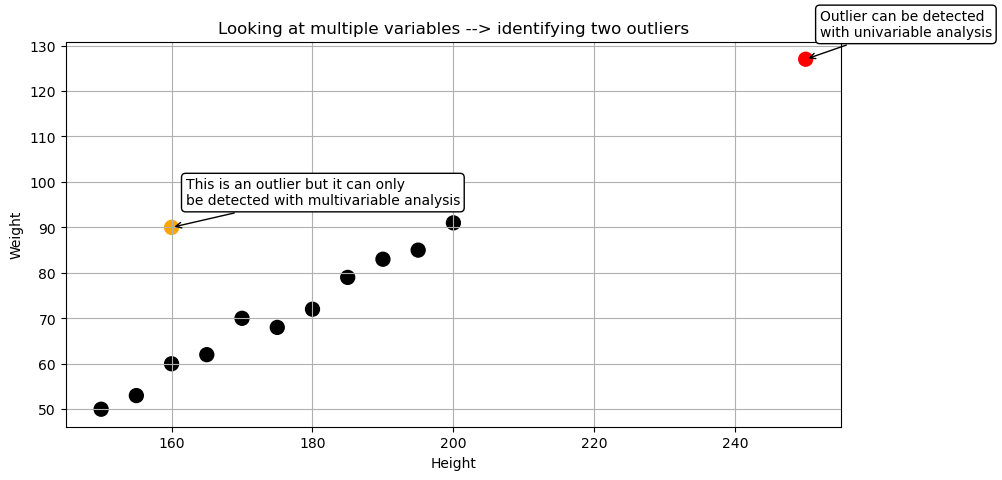

In [11]:

# Plot 3: Height vs Weight
plt.figure(figsize=(10, 5))
plt.scatter(heights, weights, c=colors, s=100)
plt.title("Looking at multiple variables --> identifying two outliers")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid(True)
plt.annotate(red_annotation,
             xy=(heights[red_index], weights[red_index]),
             xytext=(heights[red_index] + 2, weights[red_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.annotate(orange_annotation_2,
             xy=(heights[orange_index], weights[orange_index]),
             xytext=(heights[orange_index] + 2, weights[orange_index] + 5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
             arrowprops=dict(arrowstyle="->", color='black'))
plt.show()


By looking at multiple variations in componation, we observe that both red and orange point is an outlier 
- The combination of multiple vaiables are unusual.

We could detect the **red point as an outlier by univariate analysis** like "simple Z-score analysis", but the **orange point require multivariate analysis** 

**Or... an analysis on PCA transformed data!**

# Detection of outliers by the use of PCA

**Method 1:**
- **Perform PCA** to create a dateset without correlation between the components.
- **Univariate outlier detection** on the transformed data. Eg. Z-score

![Image of PCA putlier](https://towardsdatascience.com/wp-content/uploads/2024/11/1sc4quH1apgtS1gWzBaerJA.png)

**Method 2:**
- **Perform PCA** (with k components)
.
- Calculate the **distance between a data point and its projection** onto subspace found by PCA --> Error
- Or: **Recontruct** the data and find difference between original value and reconstructed value --> Error
.
- Find outliers based on **reconstruction error**. Eg.: ($(x - \hat{x})^2 < Z$)
  